# **Model Evaluation and Refinement-LAPTOP**

# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the dataset
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# WORKFLOW

1. CREATE DIFFERENT MODELS, PICK THE BEST ONES WITH A LITTLE BIT OVERFIT.
2. FINE TUNE THE BESTS MODELS.
3. APPLY CROSS VALIDATION ON THE BEST FINE TUNED MODEL.

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

# Importing the Dataset

Import the data set into a data frame.


In [3]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(filepath, header=0)

Print the value of df.head(). 


In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'. Use drop to delete these columns.


In [5]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.

**CREATING X AND Y DATA SET**

In [6]:
y_data = df['Price']
x_data = df.drop('Price',axis=1)

In [7]:
lm = LinearRegression() #object creation
X = df[['CPU_frequency']]
Y = df['Price']
#methods
lm.fit(X,Y)
Yhat=lm.predict(X)

# **Single Linear Regression**

### **DATA SPLITTING**

In [8]:
#library: from sklearn.model_selection import train_test_split
#function: train_test_split(independent var., target variable.,% of the data for testing,random_state)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
#creates a model with good accuracy and low precision

number of test samples : 24
number of training samples: 214


In [9]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.50, random_state=1)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 119
number of training samples: 119


In [10]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.90, random_state=1)
print("number of test samples :", x_test2.shape[0])
print("number of training samples:",x_train2.shape[0])
#creates a model with poor accuracy and low precision

number of test samples : 215
number of training samples: 23


### **EVALUATING A LINEAR MODEL WITH DIFFERENT TEST SIZE**

<p><b>Generalization Error</b>: Measures how well data does in predicting unseen data</p>
<p> TRAINING SET > TESTING SET: MODEL->GOOD ACCURACY,LOW PRECISION</p>
<p> TESTING SET > TRAINING SET: MODEL->LOW ACCURACY,GOOD PRECISION</p>

In [11]:
##test size=10%
lre=LinearRegression()
#TRAINING 
lre.fit(x_train[['CPU_frequency']], y_train)
#TESTING
print(lre.score(x_test[['CPU_frequency']], y_test))
print(lre.score(x_train[['CPU_frequency']], y_train))

-0.06599437350393766
0.14829792099817962


In [12]:
##test size=50%
lre1=LinearRegression()
lre1.fit(x_train1[['CPU_frequency']], y_train1)
print(lre.score(x_test1[['CPU_frequency']], y_test1))
print(lre.score(x_train1[['CPU_frequency']], y_train1))

0.06131303629895202
0.16391538940654882


In [13]:
##test size=90%
lre2=LinearRegression()
lre2.fit(x_train2[['CPU_frequency']], y_train2)
print(lre.score(x_test2[['CPU_frequency']], y_test2))
print(lre.score(x_train2[['CPU_frequency']], y_train2))

0.1136030785292027
0.23899301369964032


<hr>
<h3> <b>CROSS-VALIDATION</b>: spliting sample data into folds (training and testing set) </h3>

**Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.**


<h3>standard syntax</h3>
<p>cross_val_score(estimator, X, y=None, cv=None)</p>
<p>Parameters:</p>
<ul>
 <li>estimator: The object to use to fit the data. This is your model (e.g., KNeighborsClassifier(), Ridge(), etc.)</li>
 <li>X: The data to fit. Can be for example a list, or an array at least 2d.</li>
 <li>y: The target variable to try to predict in the case of supervised learning.</li>
<li>cv: Determines the cross-validation splitting strategy. It can be an integer (number of folds), a cross-validation generator, or an iterable.</li>

</ul>

In [14]:
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
print("The r-squared mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The r-squared mean of the folds are -0.1610923238859522 and the standard deviation is 0.38495797866647274


In [15]:
Rcross

array([-0.82012763,  0.10035872,  0.11202939, -0.03662978])

<h3>ACCESSING THE FOLDS</h3> 

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

dict_X_train = {}#empty dictionary
dict_X_test = {}
dict_Y_train = {}
dict_Y_test = {}

# Initialize a list to store R-squared errors for each fold
r_squared_errors = []
kf = KFold(n_splits=4, shuffle=True, random_state=1)
# Iterate through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    dict_X_train[fold] = X.iloc[train_index]
    dict_X_test[fold] = X.iloc[test_index]
    dict_Y_train[fold] = Y.iloc[train_index]
    dict_Y_test[fold] = Y.iloc[test_index]
    # Train the model
    model = LinearRegression()
    model.fit(dict_X_train[fold], dict_Y_train[fold])
    
    # Predict on the test set
    y_pred = model.predict(dict_X_test[fold])
    
    # Calculate R-squared error
    r2 = r2_score(dict_Y_test[fold], y_pred)
    r_squared_errors.append(r2)

    # Print fold information and R-squared error
    print("R-squared error:", r2)

print("\n")

#  print the data for each fold
#for fold in range(4):
#    print(f"Fold {fold + 1}")
#    print("X_train:", dict_X_train[fold].values)
 #   print("X_test:", dict_X_test[fold].values)
  #  print("Y_train:", dict_Y_train[fold].values)
   # print("Y_test:", dict_Y_test[fold].values)
    #print("\n")

R-squared error: -0.16914713061037956
R-squared error: 0.15222148876048036
R-squared error: 0.12985058864702226
R-squared error: 0.15242258814353904




# Overfitting of the Independent Data

It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting.

To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. 
You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.


<h3><b>ELASTICITY OF MODEL</b></h3>
<p> <b>INCREASING ORDER POLYNOMIAL: Underfitting (Strong Elasticity)-> Overfitting (Losse)<b>

Text(0.5, 1.0, 'R^2 Using Test Data')

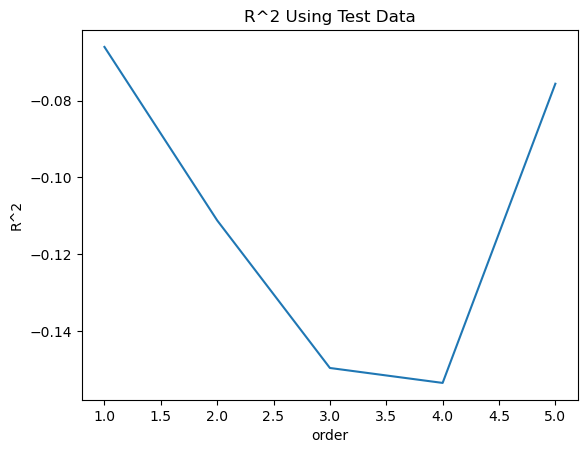

In [17]:
##test size=10%
Rsqu_test = [] # array for storing the r-square for each order polynomial
order = [1, 2, 3, 4, 5]
#evaluating r-squared of a linear equation with different order polynomial that represent the independent variable
for n in order: 
    pr = PolynomialFeatures(degree=n) #polynomial object for transforming the independent data set to polynomial function(continous)
    #transform the independent variable
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])#a polynomial feature with all the possible coefficent
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    #a linear fit with the transformed x training data set (TRAINING)
    lre.fit(x_train_pr, y_train)
    #determine the r-squared with the x transformed testing set (TESTING)
    Rsqu_test.append(lre.score(x_test_pr, y_test))
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Text(0.5, 1.0, 'R^2 Using Test Data')

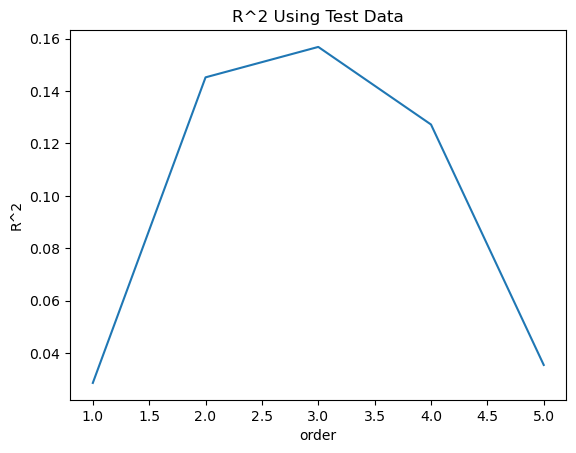

In [18]:
##test size=50%
Rsqu_test_1 = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr1 = PolynomialFeatures(degree=n)
    x_train_pr_1 = pr1.fit_transform(x_train1[['CPU_frequency']])
    x_test_pr_1 = pr1.fit_transform(x_test1[['CPU_frequency']])    
    lre1.fit(x_train_pr_1, y_train1)
    Rsqu_test_1.append(lre1.score(x_test_pr_1, y_test1))
plt.plot(order, Rsqu_test_1)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Text(0.5, 1.0, 'R^2 Using Test Data')

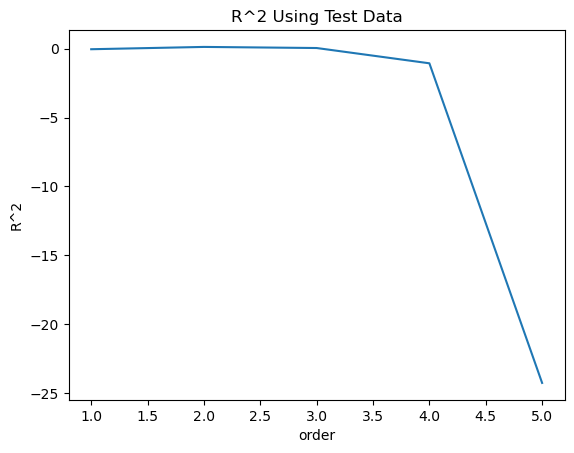

In [19]:
##test size=90%
Rsqu_test_2 = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr2 = PolynomialFeatures(degree=n)
    x_train_pr_2 = pr2.fit_transform(x_train2[['CPU_frequency']])
    x_test_pr_2 = pr2.fit_transform(x_test2[['CPU_frequency']])    
    lre2.fit(x_train_pr_2, y_train2)
    Rsqu_test_2.append(lre2.score(x_test_pr_2, y_test2))
plt.plot(order, Rsqu_test_2)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

### **EFFECT OF THE TRANSFORMED INDEPENDENT DATA SET ON THE MODEL**

The variation between the predicted y data gotten with a transformed x data and the testing y data set.

Text(0, 0.5, 'Proportion of laptops')

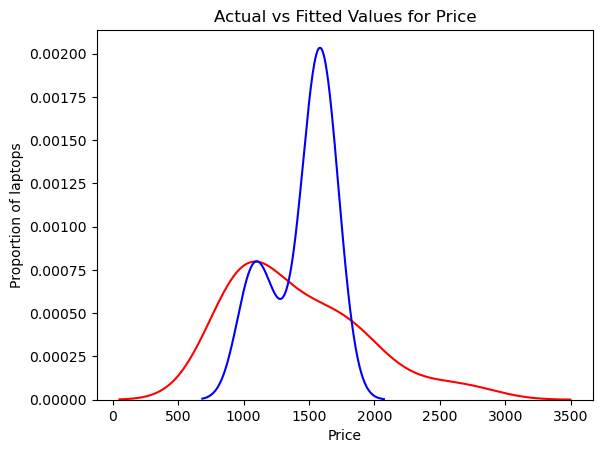

In [20]:
##test size=10%
pr_ = PolynomialFeatures(degree=1)
ll=LinearRegression()
ll.fit(pr_.fit_transform(x_train[['CPU_frequency']]),y_train)

sns.kdeplot(y_test,color="r", label="Actual Value")#testing set
sns.kdeplot(ll.predict(pr_.fit_transform(x_test[['CPU_frequency']])), color="b", label="Fitted Values")#predicted y data set gotten with a transformed x data.

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

Text(0, 0.5, 'Proportion of laptops')

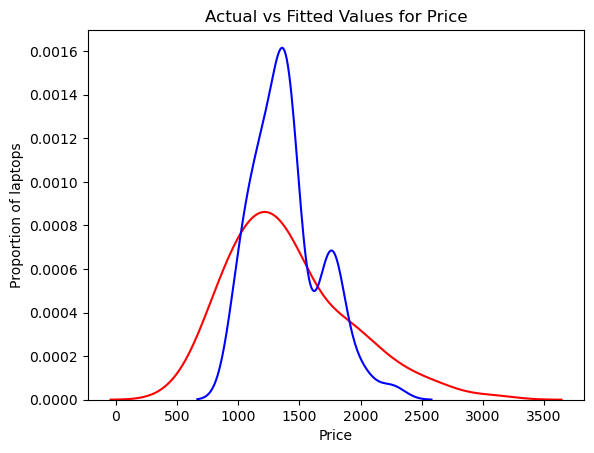

In [21]:
##test size=50%
pr_1 = PolynomialFeatures(degree=2)
ll_1=LinearRegression()
ll_1.fit(pr_1.fit_transform(x_train1[['CPU_frequency']]),y_train1)

sns.kdeplot(y_test1,color="r", label="Actual Value")
sns.kdeplot(ll_1.predict(pr_1.fit_transform(x_test1[['CPU_frequency']])), color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

Text(0, 0.5, 'Proportion of laptops')

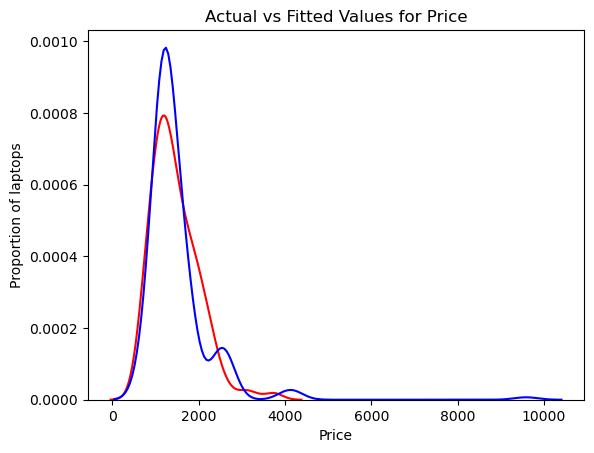

In [22]:
##test size=90%
pr_2 = PolynomialFeatures(degree=4)
ll_2=LinearRegression()
ll_2.fit(pr_2.fit_transform(x_train2[['CPU_frequency']]),y_train2)

sns.kdeplot(y_test2,color="r", label="Actual Value")
sns.kdeplot(ll_2.predict(pr_2.fit_transform(x_test2[['CPU_frequency']])), color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [23]:
hat = ll_2.predict(pr_2.fit_transform(x_test2[['CPU_frequency']]))

In [24]:
hat[0]

1689.7461045712698

In [25]:
#creating a dataframe for the predicted values
hat = ll_2.predict(pr_2.fit_transform(x_test2[['CPU_frequency']]))
dictionary = {'1': hat}
dff=pd.DataFrame(dictionary)
dff.head()

,1
0,1689.746105
1,1219.947268
2,1219.947268
3,1689.746105
4,2553.621252


In [26]:
x_test2['CPU_frequency'].head()

202    0.931034
130    0.862069
88     0.862069
95     0.931034
218    0.965517
Name: CPU_frequency, dtype: float64

In [27]:
ll_2.score(pr_2.fit_transform(x_test2[['CPU_frequency']]),y_test2)

-1.064960358800532

**A negative r-squared value with a good distribution plot indictate that the linear-regression is'nt the best fit to represent the relationship between the x and y data**

MEAN_SQUARED_ERROR

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ll_2.predict(pr_2.fit_transform(x_test2[['CPU_frequency']])),y_test2)

632681.0666019482

## SPLITING WITH 75% TESTING DATA

In [29]:
#split data
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_data, y_data, test_size=0.75, random_state=1)
print("number of test samples :", x_test3.shape[0])
print("number of training samples:",x_train3.shape[0])

number of test samples : 179
number of training samples: 59


In [30]:
#transform data
pr3 = PolynomialFeatures(degree=2)
x_train_pr_3 = pr3.fit_transform(x_train3[['CPU_frequency']])
x_test_pr_3 = pr3.fit_transform(x_test3[['CPU_frequency']])    
print(x_train_pr_3.shape,y_train3.shape)

(59, 3) (59,)


In [31]:
#model creation
lre3=LinearRegression()
lre3.fit(x_train_pr_3, y_train3)

LinearRegression()

Text(0.5, 1.0, 'R^2 Using Test Data')

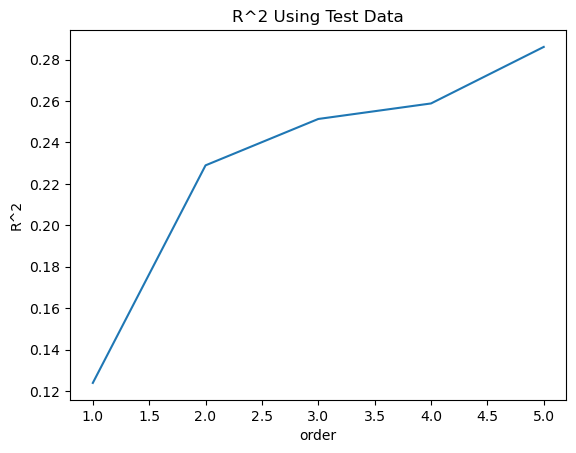

In [32]:
#picking the best transformed model 
Rsqu_test_3 = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr3 = PolynomialFeatures(degree=n)
    x_train_pr_3 = pr3.fit_transform(x_train3[['CPU_frequency']])
    x_test_pr_3 = pr3.fit_transform(x_test3[['CPU_frequency']])    
    lre3.fit(x_train_pr_3, y_train3)
    Rsqu_test_3.append(lre3.score(x_test_pr_3, y_test3))
plt.plot(order, Rsqu_test_3)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Text(0, 0.5, 'Proportion of laptops')

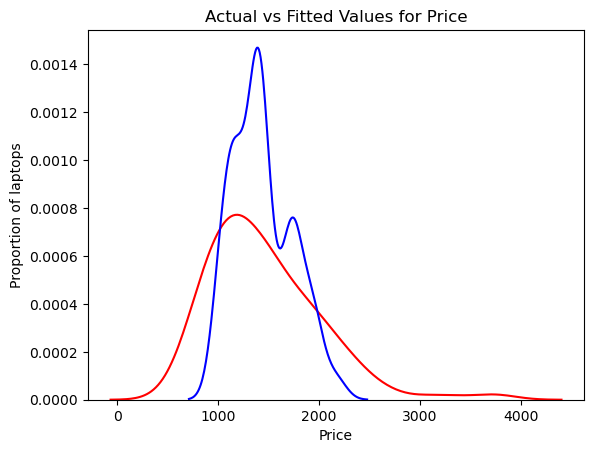

In [33]:
#Model evaluation
pr_3 = PolynomialFeatures(degree=2)
#training dataset
ll_3=LinearRegression()
ll_3.fit(pr_3.fit_transform(x_train3[['CPU_frequency']]),y_train3)

sns.kdeplot(y_test3,color="r", label="Actual Value")
sns.kdeplot(ll_3.predict(pr_3.fit_transform(x_test3[['CPU_frequency']])), color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [34]:
print("R-squared error:",ll_2.score(pr_2.fit_transform(x_test3[['CPU_frequency']]),y_test3))

R-squared error: 0.04405678662858625


In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,ll_3.predict(pr_3.fit_transform(x_test3[['CPU_frequency']])))

240548.4320204875

## **ORDINARY LEAST SQUARE REGRESSION**

<p>Ordinary Least Squares (OLS) linear regression is used to find the optimal values of the coefficients in a linear equation that best describe the relationship between the independent variable(s) and the dependent variable.</p>


<p>Model representation</p>
The linear regression model is represented as:
\[ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p + \varepsilon \]

Where:
- \( Y \) is the dependent variable.
- \( X_1, X_2, \ldots, X_p \) are the independent variables.
- \( \beta_0 \) is the intercept.
- \( \beta_1, \beta_2, \ldots, \beta_p \) are the coefficients.
- \( \varepsilon \) is the error term.

<p><b>The cost function</b> (also known as the objective function) in OLS regression is the sum of the squared residuals:</p>
\[ \text{Cost Function} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 \]

Where:
- \( Y_i \) is the observed value.
- \( \hat{Y}_i \) is the predicted value.

<p><b>Estimating Coefficients</b> In OLS regression, the coefficients are estimated by minimizing the sum of squared residuals. The formula for estimating the coefficients in matrix form is:</p>
\[ \hat{\beta} = (X^TX)^{-1}X^TY \]

Where:
- \( X \) is the matrix of input features.
- \( Y \) is the vector of observed values.
- \( \hat{\beta} \) is the vector of estimated coefficients.


# **RIGDE REGRESSION**

<p>The linear regression model in ridge regression is represented as</p>:
$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p + \varepsilon$$

Where:
- \( Y ) is the dependent variable.
- (X_1, X_2, ..., X_p) are the independent variables.
- \( \beta_0 \) is the intercept.
- \( \beta_1, \beta_2, \ldots, \beta_p \) are the coefficients.
- \( \varepsilon \) is the error term.


<p><b>The cost function</b> in ridge regression adds a penalty term to the OLS cost function to shrink the coefficients:</p>
\[ \text{Cost Function} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \]

Where:
- \( \lambda \) is the regularization parameter (hyperparameter).
- \( \beta_j \) are the coefficients of the independent variables.


<p><b>In ridge regression</b>, the coefficients are estimated by minimizing the modified cost function, which includes the regularization term. The formula for estimating the coefficients in matrix form is:</p>
\[ \hat{\beta} = (X^TX + \lambda I)^{-1}X^TY \]

Where:
- \( X \) is the matrix of input features.
- \( Y \) is the vector of observed values.
- \( \lambda \) is the regularization parameter.
- \( I \) is the identity matrix.


### **Ridge Regression: controls the mag. coeffiecient of the polynominal. Prevents overfitting**

<p>Model created from multiple independent variable</p>
<p><b>INCREASING ALPHA:</b></p> 
<p><b>OVERFITTING -> UNDERFITTING (COEFFICIENT APPROACHES 0)</b></p>
Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.


In [36]:
pr=PolynomialFeatures(degree=1)

In [37]:
x_train_pr=pr.fit_transform(x_train3[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test3[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [38]:
x_train_pr.shape

(59, 8)

In [39]:
 y_train3.shape

(59,)

In [40]:
#creating a ridge regression object
RigeModel=Ridge(alpha=1)

In [41]:
#creating a ridge regression fit
RigeModel.fit(x_train_pr, y_train3)

Ridge(alpha=1)

Text(0, 0.5, 'Proportion of laptops')

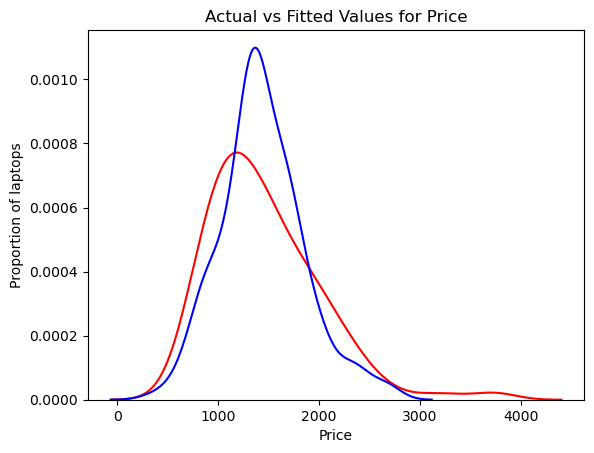

In [42]:
sns.kdeplot( y_test3,color="r", label="Actual Value")
sns.kdeplot(RigeModel.predict(x_test_pr), color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [43]:
RigeModel.predict(x_test_pr)[0:5]

array([1423.96979787, 1565.76210616, 1340.47928858, 1558.779625  ,
       1399.65527942])

In [44]:
y_test3[0:5]

202     939
130    1142
88     1453
95     1142
218    1531
Name: Price, dtype: int64

In [45]:
#EVALUATION
RigeModel.score(x_test_pr, y_test3)

0.37575900463814316

In [46]:
mean_squared_error(y_test3, RigeModel.predict(x_test_pr))

194741.1393240003

Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
Create a list of all Ridge Regression R^2 scores for training and testing data. 


In [47]:
# Write your code below and press Shift+Enter to execute 
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train3) #TRAINING
    test_score, train_score = RigeModel.score(x_test_pr, y_test3), RigeModel.score(x_train_pr, y_train3) #EVALUATION
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|███████████████████████████████████████████| 999/999 [00:06<00:00, 159.13it/s, Test Score=0.376, Train Score=0.54]


Plot the R^2 values for training and testing sets with respect to the value of alpha


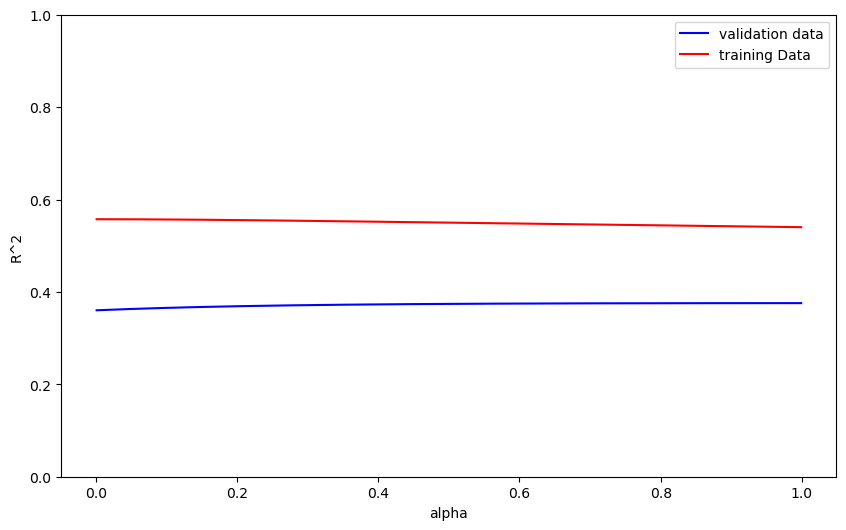

In [48]:
# Write your code below and press Shift+Enter to execute 
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, 'b',label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

# Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. 
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


<h3>standard syntax</h3>
<p>GridSearchCV(estimator, param_grid, cv=None)</p>
<p>Parameters:</p>
<ul>
 <li>estimator: The object to use to fit the data (e.g., KNeighborsClassifier(), Ridge(), etc.).</li>
 <li>param_grid: Dictionary or list of dictionaries with parameters names (str) as keys and lists of parameter settings to try as values.</li>
 <li>cv: Determines the cross-validation splitting strategy. It can be an integer (number of folds), a cross-validation generator, or an iterable.</li>
</ul>

In [49]:
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

Create a Ridge instance and run Grid Search using a 4 fold cross validation.


In [50]:
RR=Ridge()#creating the ridge regression object
Grid1 = GridSearchCV(RR, parameters1,cv=4)#GridSearchCV the ridge regression object

Fit the Grid Search to the training data.


In [51]:
#modelling
Grid1.fit(x_train3[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train3)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [52]:
#evaluation
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test3[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test3))

0.37575900463814316


In [53]:
BestRR

Ridge(alpha=1)